In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go

c:\Users\keyvanjaferzadeh\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [47]:
#rreading file
df = pd.read_csv("clear dataset 2019-2022.csv")
df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77691 entries, 0 to 77690
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       77691 non-null  int64         
 1   product_id        77691 non-null  int64         
 2   basket_id         77691 non-null  int64         
 3   loyalty           77691 non-null  object        
 4   household_type    77691 non-null  object        
 5   age_band          77691 non-null  object        
 6   department        77691 non-null  object        
 7   brand             77691 non-null  object        
 8   commodity         77691 non-null  object        
 9   store             77691 non-null  int64         
 10  price             77691 non-null  float64       
 11  transaction_date  77691 non-null  datetime64[ns]
 12  year              77691 non-null  int64         
 13  month             77691 non-null  int64         
dtypes: datetime64[ns](1), 

In [5]:
tmp=df.groupby(['household_type','loyalty']).agg(number_customers=('customer_id', pd.Series.nunique)).reset_index()

In [ ]:
np.unique(df["loyalty"])

In [6]:
mask=tmp['loyalty']=='Loyalist'

In [ ]:
tmp.loc[mask].to_clipboard(index=False)  

In [8]:
df.groupby(['loyalty','household_type']) \
    .agg(number_customers=('customer_id', pd.Series.nunique)).reset_index()


,loyalty,household_type,number_customers
0,First Time Buyer,1 adult with kids,22
1,First Time Buyer,2 adults with kids,6
2,First Time Buyer,2 adults with no kids,11
3,First Time Buyer,Single female,4
4,First Time Buyer,Single male,5
5,Loyalist,1 adult with kids,587
6,Loyalist,2 adults with kids,159
7,Loyalist,2 adults with no kids,282
8,Loyalist,Single female,110
9,Loyalist,Single male,203


In [234]:
df[df.loyalty =='Loyalist'] \
    .groupby(['household_type']) \
    .agg(number_customers=('customer_id', pd.Series.nunique))


,number_customers
household_type,
1 adult with kids,523
2 adults with kids,136
2 adults with no kids,255
Single female,100
Single male,172


<AxesSubplot:title={'center':'Loyalist commodity'}, ylabel='commodity'>

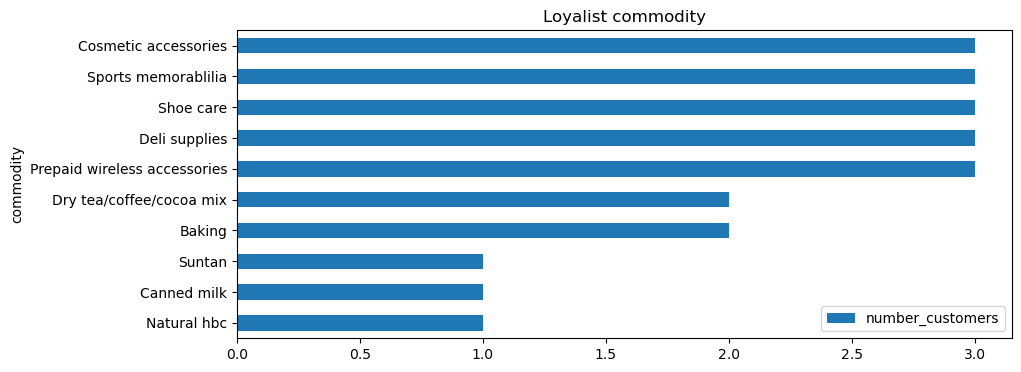

In [10]:
##############??
temp=df[df.loyalty =='Loyalist'] \
    .groupby(['commodity']) \
    .agg(number_customers=('customer_id', pd.Series.nunique))\
    .sort_values('number_customers').head(10)
temp.plot(kind='barh',figsize=(10, 4), title= "Loyalist commodity")

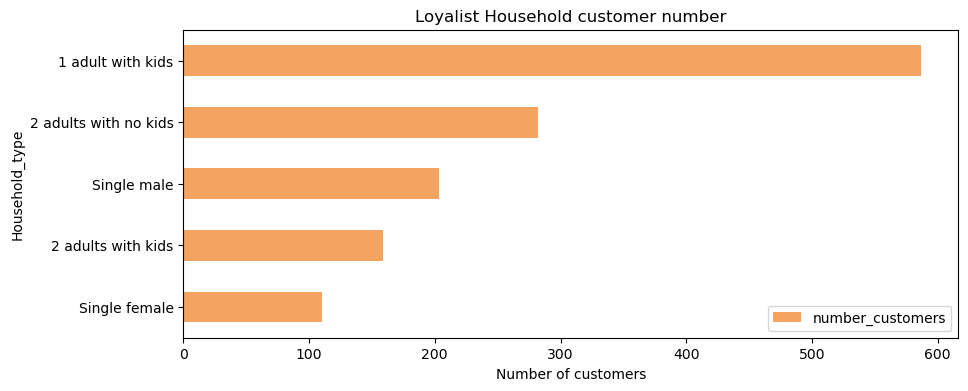

In [11]:
#####    Fig1
temp=df[df.loyalty =='Loyalist'] \
    .groupby(['household_type']) \
    .agg(number_customers=('customer_id', pd.Series.nunique))\
    .sort_values('number_customers')
temp.plot(kind='barh',figsize=(10, 4),title= "Loyalist Household customer number",color='sandybrown')
plt.xlabel('Number of customers')
plt.ylabel('Household_type');
plt.savefig("Loyalist Household customer number",bbox_inches="tight")

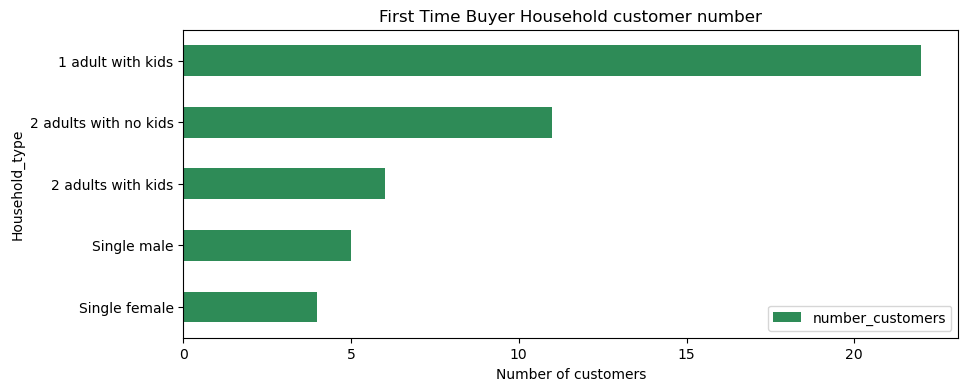

In [12]:
######   Fig2
temp=df[df.loyalty =='First Time Buyer'] \
    .groupby(['household_type']) \
    .agg(number_customers=('customer_id', pd.Series.nunique))\
    .sort_values('number_customers')
temp.plot(kind='barh',figsize=(10, 4),title= "First Time Buyer Household customer number",color='seagreen')
plt.xlabel('Number of customers')
plt.ylabel('Household_type');
plt.savefig("First Time Buyer Household customer number",bbox_inches="tight")

,household_type,total_revenue,count_customer,Revenue_per_customer
1,2 adults with kids,11822.14,159,74.353082
4,1 adult with kids,44046.62,587,75.036831
3,2 adults with no kids,21687.09,282,76.904574
0,Single female,8498.98,110,77.263455


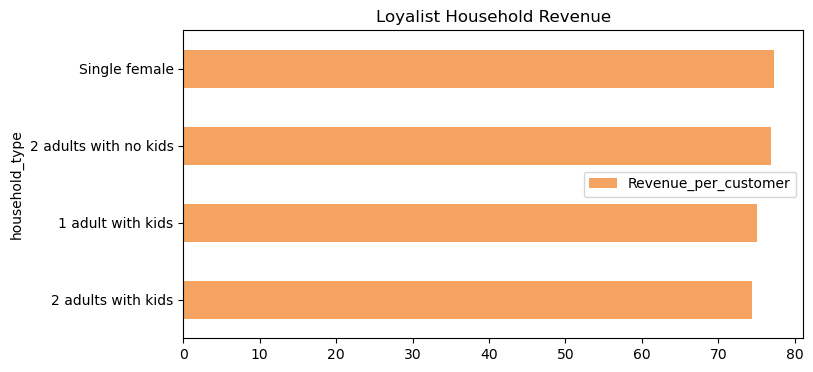

In [56]:
temp=df[df.loyalty =='Loyalist'] \
    .groupby(['household_type']) \
    .agg(total_revenue=('price', sum),count_customer=('customer_id', pd.Series.nunique))\
    .sort_values('total_revenue').reset_index()
temp['Revenue_per_customer']=temp['total_revenue']/temp['count_customer']
temp=temp.sort_values('Revenue_per_customer',ascending=True).head(4)
temp[['household_type','Revenue_per_customer']].plot(kind='barh',x='household_type',y='Revenue_per_customer',figsize=(8, 4), title= "Loyalist Household Revenue",color='sandybrown')
temp.head(5)

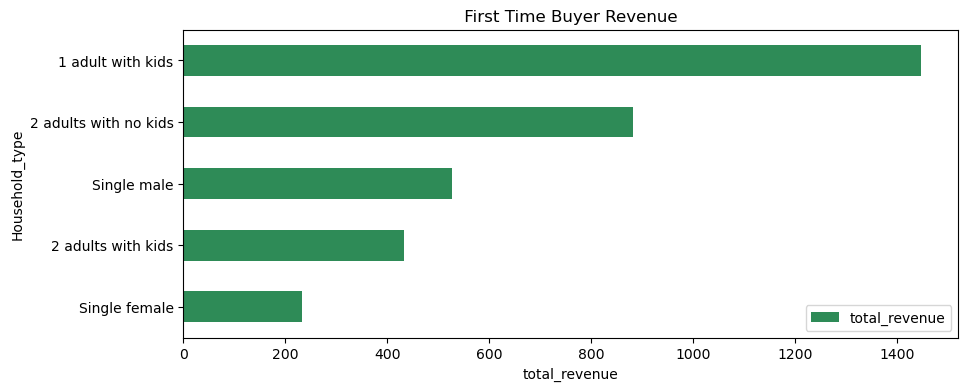

In [14]:
temp=df[df.loyalty =='First Time Buyer'] \
    .groupby(['household_type']) \
    .agg(total_revenue=('price', sum))\
    .sort_values('total_revenue').head(10)
temp.plot(kind='barh',figsize=(10, 4), title= " First Time Buyer Revenue ",color='seagreen')
plt.xlabel('total_revenue')
plt.ylabel('Household_type');
plt.savefig("First Time Buyer total_revenue",bbox_inches="tight")

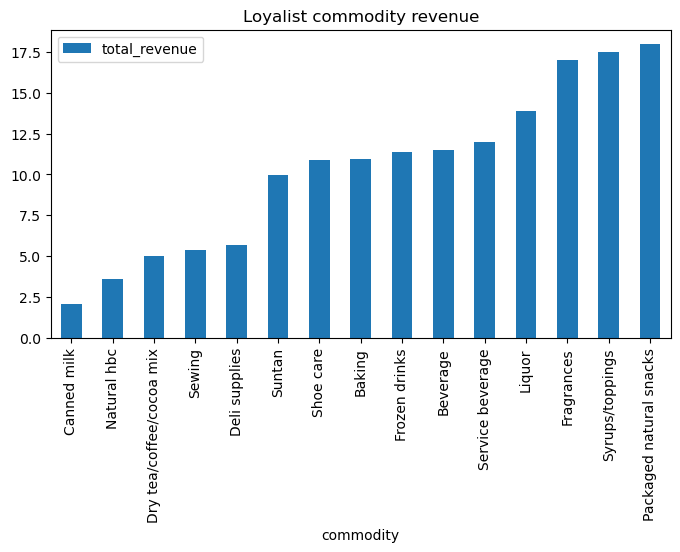

In [15]:
######################?
temp=df[df.loyalty =='Loyalist'] \
    .groupby(['commodity']) \
    .agg(total_revenue=('price', sum))\
    .sort_values('total_revenue').head(15)
temp.plot(kind='bar',figsize=(8, 4), title= "Loyalist commodity revenue")
plt.savefig("Loyalist commodity revenue",bbox_inches="tight")

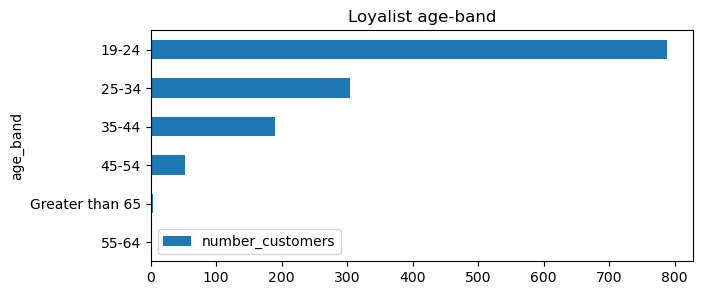

In [16]:
temp=df[df.loyalty =='Loyalist'] \
    .groupby(['age_band']) \
    .agg(number_customers=('customer_id', pd.Series.nunique))\
    .sort_values('number_customers')
temp.plot(kind='barh',figsize=(7, 3), title= "Loyalist age-band")
plt.savefig("Loyalist age-band",bbox_inches="tight")


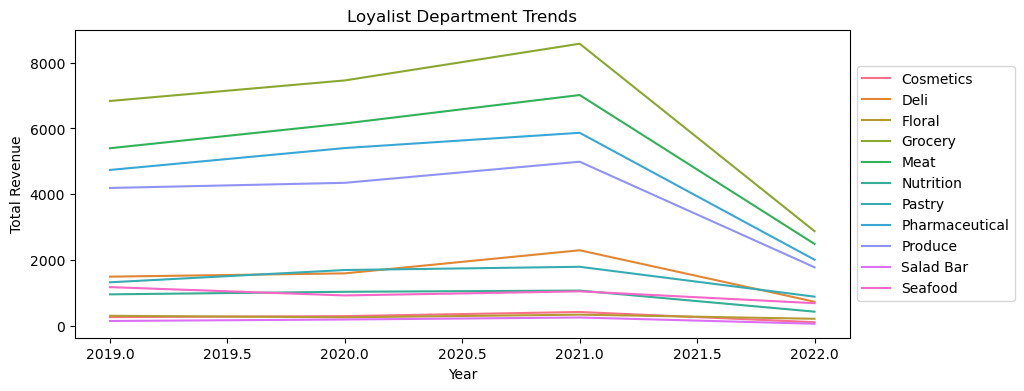

In [25]:
###### Fig3
###### Fig3
temp=df[df.loyalty =='Loyalist']\
          .groupby(['year','department'])\
          .agg(total_revenue=('price', sum))\
          .sort_values('department')
plt.figure(figsize=(10,4));
fig=fig_plot.get_figure()

fig_plot=sns.lineplot(data=temp, x='year', y='total_revenue', hue='department')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Loyalist Department Trends')
fig.savefig("department trends",bbox_inches="tight")

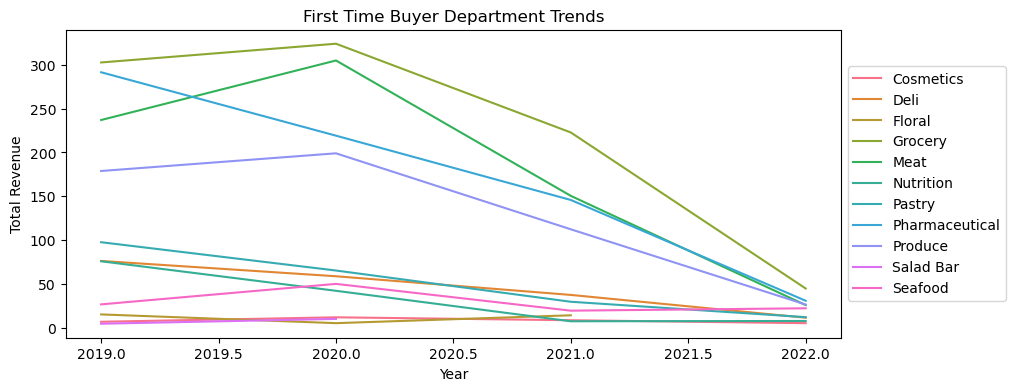

In [26]:
###### Fig 4
temp=df[df.loyalty =='First Time Buyer']\
          .groupby(['year','department'])\
          .agg(total_revenue=('price', sum))\
          .sort_values('department')
plt.figure(figsize=(10,4));
fig_plot=sns.lineplot(data=temp, x='year', y='total_revenue', hue='department')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Year')
plt.ylabel('Total Revenue');
plt.title('First Time Buyer Department Trends')
fig=fig_plot.get_figure()
fig.savefig("First Time Buyer department trends",bbox_inches="tight")


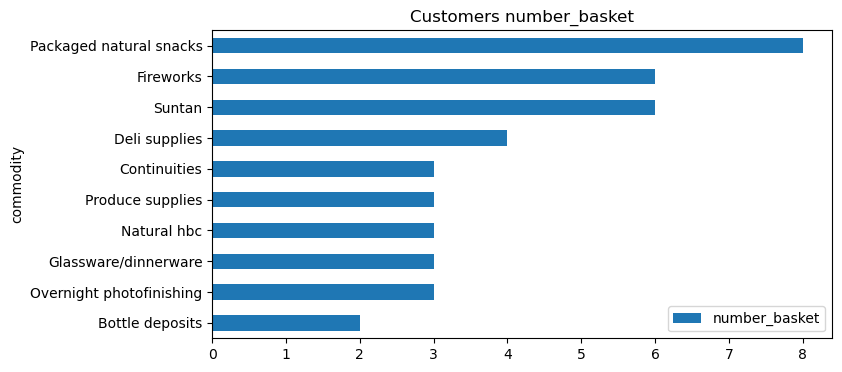

In [34]:
temp=df.groupby(['commodity']).agg(number_basket=('basket_id', pd.Series.nunique))\
    .sort_values('number_basket').head(10)
temp.plot(kind='barh',figsize=(8, 4), title= "Customers number_basket")
plt.savefig("Customers number_basket.jpg", bbox_inches="tight")


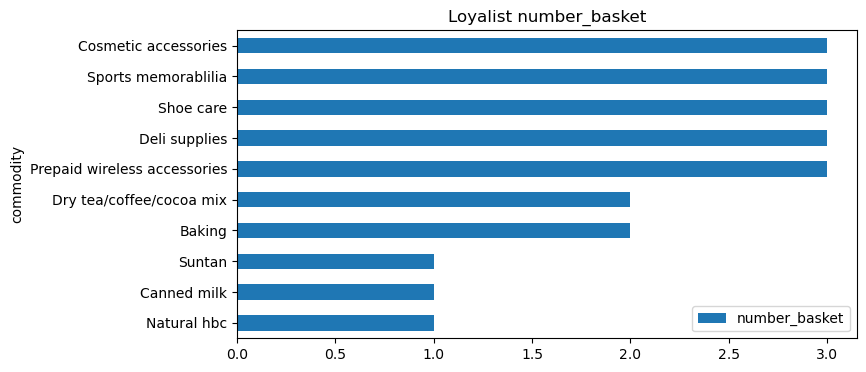

In [35]:
temp=df[df.loyalty =='Loyalist'] \
.groupby(['commodity']).agg(number_basket=('basket_id', pd.Series.nunique))\
    .sort_values('number_basket').head(10)
temp.plot(kind='barh',figsize=(8, 4), title= "Loyalist number_basket")
plt.savefig("Loyalist number_basket",bbox_inches="tight")


In [39]:
tmp = df.groupby(['household_type','commodity']).agg(total_revenue=('price',sum)).reset_index()
pd.concat(
    [tmp[tmp.household_type == hh] \
         .sort_values('total_revenue', ascending=False) \
     .head(3) for hh in tmp.household_type.unique()])



,household_type,commodity,total_revenue
19,1 adult with kids,Beef,4118.67
45,1 adult with kids,Cheese,1552.56
63,1 adult with kids,Deli meats,1489.57
261,2 adults with kids,Beef,5070.47
351,2 adults with kids,Frozen meat,1913.31
288,2 adults with kids,Cheese,1887.75
507,2 adults with no kids,Beef,3639.89
687,2 adults with no kids,Seafood-frozen,2100.00
533,2 adults with no kids,Cheese,1340.66
751,Single female,Beef,1643.55


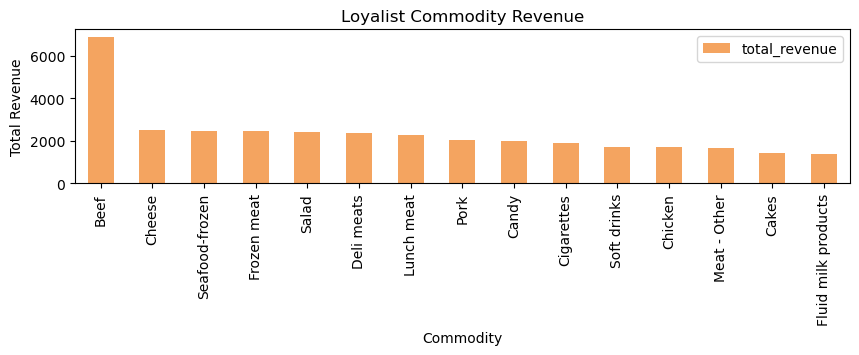

In [40]:
###### Fig 5
temp=df[df.loyalty =='Loyalist'] \
    .groupby(['commodity']) \
    .agg(total_revenue=('price', sum))\
    .sort_values('total_revenue',ascending=False).head(15)
temp.plot(kind='bar',figsize=(10, 2), title= "Loyalist Commodity Revenue",color='sandybrown')
plt.xlabel('Commodity')
plt.ylabel('Total Revenue');
plt.savefig("Loyalist commodity revenue",bbox_inches="tight")

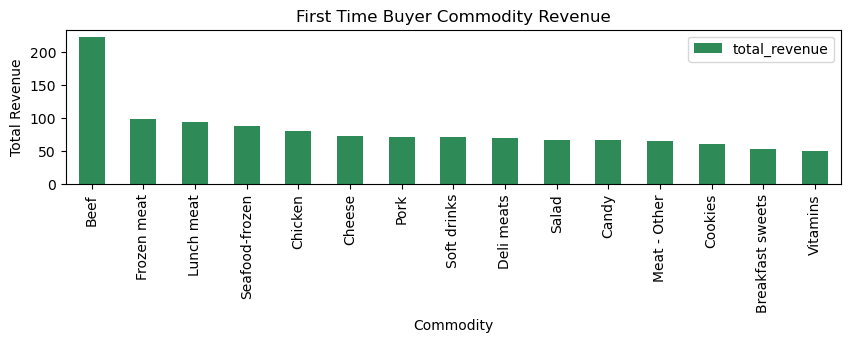

In [41]:
####### Fig 6
temp=df[df.loyalty =='First Time Buyer'] \
    .groupby('commodity').agg(total_revenue=('price', 'sum'))\
    .sort_values('total_revenue',ascending=False).head(15)
temp.plot(kind='bar',figsize=(10, 2), title= "First Time Buyer Commodity Revenue",color='seagreen')
plt.xlabel('Commodity')
plt.ylabel('Total Revenue');
plt.savefig("First Time Buyer commodity revenue",bbox_inches="tight")


<AxesSubplot:title={'center':'Revenue trends'}, xlabel='month'>

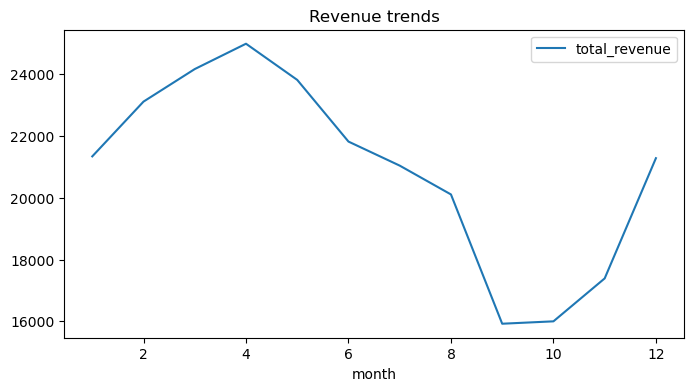

In [42]:
df.groupby(['month']).agg(total_revenue=('price', sum)).plot(figsize=(8, 4), title= "Revenue trends")

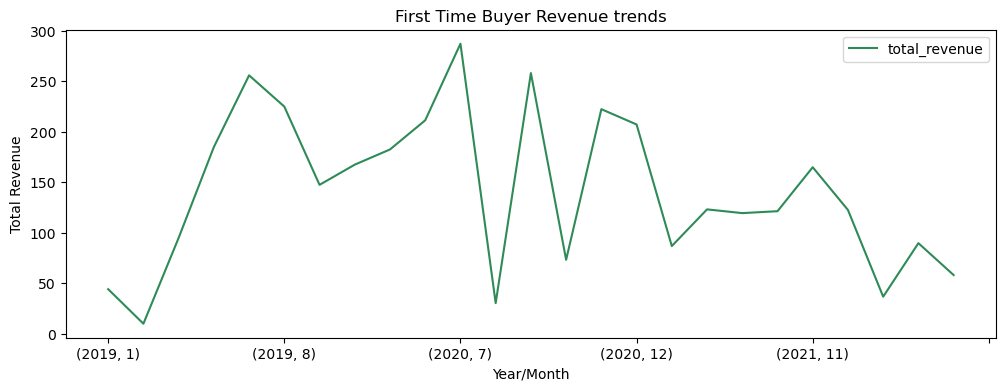

In [43]:
#####fig 8
temp=df[df.loyalty =='First Time Buyer'] \
   .groupby(['year','month']).agg(total_revenue=('price', sum))
temp.plot(figsize=(12, 4), title= "First Time Buyer Revenue trends",color='seagreen')
plt.xlabel('Year/Month')
plt.ylabel('Total Revenue');
plt.savefig("First Time Buyer Revenue trends",bbox_inches="tight")


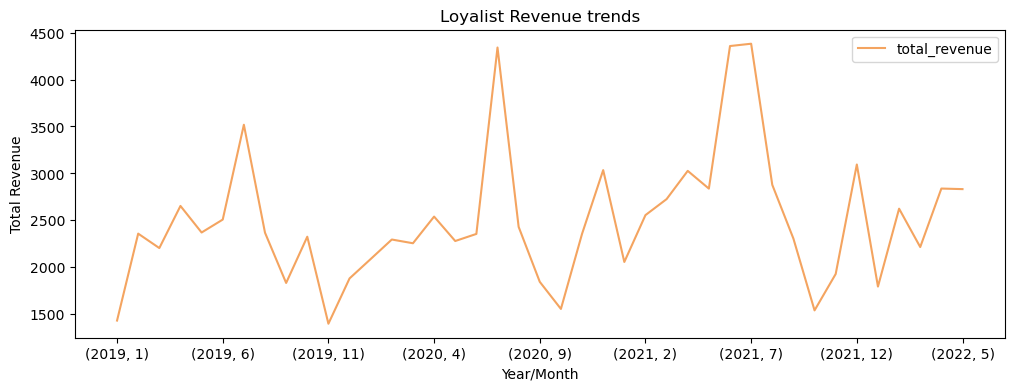

In [52]:
### Fig 7
temp=df[df.loyalty =='Loyalist'] \
   .groupby(['year','month']).agg(total_revenue=('price', sum))
temp.to_clipboard()
temp.plot(figsize=(12, 4), title= "Loyalist Revenue trends",color='sandybrown')
plt.xlabel('Year/Month')
plt.ylabel('Total Revenue')
plt.savefig("Loyalist Revenue trends",bbox_inches="tight")

In [49]:
df[df.transaction_date.dt.month < 7] \
    .groupby(['year']) \
    .agg({'price': ['min', 'max', 'mean', 'sum']})

price                           
       min    max      mean       sum
year                                 
2019   0.1  56.97  3.281043  35710.87
2020   0.1  56.97  3.242128  36253.47
2021   0.1  43.69  3.240754  37369.13
2022   0.1  49.22  3.357441  29908.08

<AxesSubplot:xlabel='brand,year'>

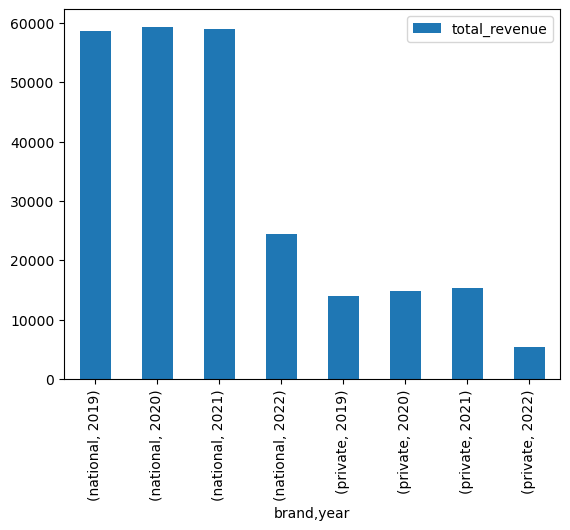

In [53]:
df.groupby(['brand', 'year']).agg(total_revenue=('price', sum)).plot.bar()